In March of 2020 the COVID-19 virus was officially declared a pandemic by the [World Health Organization](https://www.who.int/director-general/speeches/detail/who-director-general-s-opening-remarks-at-the-media-briefing-on-covid-19---11-march-2020). The COVID-19 pandemic created a glocal economic slowdown as countries all over the world were forced into a [lockdown](https://ig.ft.com/coronavirus-lockdowns/). While the United States as a whole was never completely locked down, different states implemented their own mask mandates and COVID related [restrictions](https://www.nytimes.com/interactive/2020/us/states-reopen-map-coronavirus.html). Many restaurants and businesses were forced to close as a result of the COVID-19 induced lockdowns, which led to historical unemployment numbers. Businesses were closing left and right, hundreds of thousands of Americans lost their jobs, and over 23 million people filed for unemployment in April alone ([BLS](https://www.bls.gov/charts/employment-situation/civilian-unemployment.htm)).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

industry = pd.read_csv("data/employment by industry.csv")
cbi = pd.read_csv("data/change by industry.csv")
cur = pd.read_csv("data/civilian unemployment rate.csv")
cu = pd.read_csv("data/civilian unemployment.csv")
age = pd.read_csv("data/age sex and marital status.csv") 

#Make the types that arent floats into floats
for column in cu:
    if column != 'Month':
        cu[column] = cu[column].str.replace(",", "").astype(float)
for column in industry:
    if column != 'Month' and column != 'Mining and logging' and column != 'Utilities':
        industry[column] = industry[column].str.replace(",", "").astype(float)
cbi['Employed (thousands)'] = cbi['Employed (thousands)'].str.replace(',', "").astype(float)
cbi['12-month net change (thousands)'] = cbi['12-month net change (thousands)'].str.replace(',', "").astype(float)


## Unemployment Rates

### Graph of unemployment rates by race
Graphing unemployment rates of White, Black or African American, Asian, and Hispanic or Latino categories to compare against the total rate.

The graph is very large and hard to discern, shortening the range to January 2019 - Feb 2021 makes the visualization easier on the eyes. 

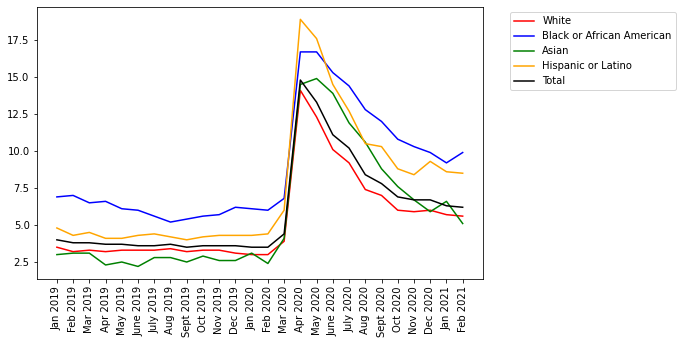

In [263]:
#Plot the unemployment rate for white and black people Feb 2019 to Feb 2021
#plt.plot(cur['Month'], cur['White'])
#plt.plot(cur['Month'], cur['Black or African American'])
#plt.plot(cur['Month'], cur['Total'])
#plt.xticks(rotation=90)
#plt.show()
plt.rcParams['figure.figsize']=(8,5)

plt.plot(cur['Month'][215:], cur['White'][215:], color='red')
plt.plot(cur['Month'][215:], cur['Black or African American'][215:], color='blue')
plt.plot(cur['Month'][215:], cur['Asian'][215:], color='green')
plt.plot(cur['Month'][215:], cur['Hispanic or Latino'][215:], color='orange')
plt.plot(cur['Month'][215:], cur['Total'][215:], color='black')
plt.xticks(rotation=90)
labels = ['White', 'Black or African American', 'Asian', 'Hispanic or Latino', 'Total']
plt.legend(bbox_to_anchor=(1.05, 0.8, 0.3, 0.2), loc='upper left', labels=labels)
plt.show()

Based on the graph above, unemployment rates for Black or African American and Hispanic or Latino look to be greater than the total rate. The Asian category has a portion that looks greater, but there is also a portion of the graph where Asian rate falls below the total.The red line, or the White category, looks to be the lowest and is consistently below the black line.

Test every category to see if there is evidence that a certain group is favored.
### Testing unemployment by race

In [264]:
#print(stats.mannwhitneyu(cur['White'][220:], cur['Total'][220:], alternative='greater'))
#print(stats.mannwhitneyu(cur['Asian'][220:], cur['Total'][220:], alternative='greater'))
#print(stats.mannwhitneyu(cur['Black or African American'][220:], cur['Total'][220:], alternative='greater'))
#print(stats.mannwhitneyu(cur['Hispanic or Latino'][220:], cur['Total'][220:], alternative='greater'))
#print("White Less: ", stats.mannwhitneyu(cur['Asian'], cur['Total'], alternative='greater')) #part of the green line is above the black line
#print("White Less: ", stats.mannwhitneyu(cur['Asian'], cur['Total'], alternative='less')) #part of the green line is below the black line
#print("White Less: ", stats.mannwhitneyu(cur['Black or African American'], cur['Total'], alternative='greater')) #the blue line is above the black line
#print("White Less: ", stats.mannwhitneyu(cur['Hispanic or Latino'], cur['Total'], alternative='greater')) # the orange line is above the black line

#Test to see if the means can be considered equal
print("AH: White mean = total mean - p = ", stats.mannwhitneyu(cur['White'], cur['Total']).pvalue)
print("AH: Asian mean = total mean - p = ", stats.mannwhitneyu(cur['Asian'], cur['Total']).pvalue)
print("AH: Black or African American mean = total mean - p = ", stats.mannwhitneyu(cur['Black or African American'], cur['Total']).pvalue)
print("AH: Hispanic or Latino mean = total mean - p = ", stats.mannwhitneyu(cur['Hispanic or Latino'], cur['Total']).pvalue)
print()
print()
#based on the initial test we can see that none of the categories have means that can be statistically equivalent to the total unemployment rate
#we will perform alternative tests to prove which direction this offset belongs to 
#the type of alternative hypothesis is based on the intnerpretation of the graph
p = stats.mannwhitneyu(cur['White'], cur['Total'], alternative='less')  #red line is below black line
print("AH: White is less than total - p value = ", p.pvalue)
p = stats.mannwhitneyu(cur['Asian'], cur['Total'], alternative='greater')  #part of green line is above black line
print("AH: Asian is greater than total - p value = ", p.pvalue)
p = stats.mannwhitneyu(cur['Asian'], cur['Total'], alternative='less')  #part of green line is below black line
print("AH: Asian is less than total - p value = ", p.pvalue)
p = stats.mannwhitneyu(cur['Black or African American'], cur['Total'], alternative='greater')  #blue line is above black line
print("AH: Black or African American is less than total - p value = ", p.pvalue)
p = stats.mannwhitneyu(cur['Hispanic or Latino'], cur['Total'], alternative='greater')  #orange line is above black line
print("AH: Hispanic or Latino is less than total - p value = ", p.pvalue)

AH: White mean = total mean - p =  7.446586637749099e-07
AH: Asian mean = total mean - p =  2.642731786827147e-07
AH: Black or African American mean = total mean - p =  1.047455665291668e-53
AH: Hispanic or Latino mean = total mean - p =  3.2674131297136267e-13


AH: White is less than total - p value =  7.446586637749099e-07
AH: Asian is greater than total - p value =  0.9999997366245699
AH: Asian is less than total - p value =  2.642731786827147e-07
AH: Black or African American is less than total - p value =  1.047455665291668e-53
AH: Hispanic or Latino is less than total - p value =  3.2674131297136267e-13


Results from the previous tests conclude that White and Asian categories are favored while Black or African American and Hispanic or Latino are unfavored.

There is statistical significance in the unemployment rates that show that a larger portion of Black or African American and Hisplanic or Latino people are unemployed compared to White and Asian people. 

### Graph of unemployment rates by age

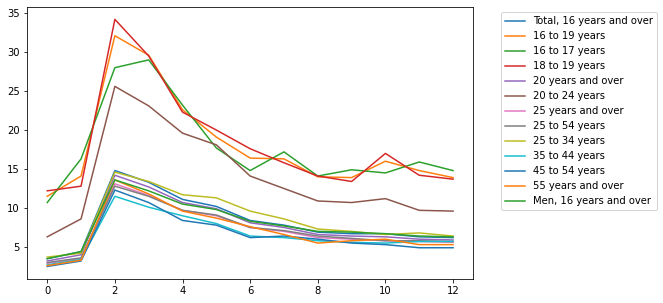

In [265]:
#Try plotting everyone - wayy to many graphs
labels = []
for index, row in age.iterrows():
    #print(row[0])
    if "year" in str(row[0]):
        temp =  row.values.tolist()
        labels.append(temp[0])
        temp.pop(0)
        temp = [float(num) for num in temp]
        plt.plot(temp)
    if "Men" in str(row[0]):
        break

plt.legend(bbox_to_anchor=(1.05, 0.8, 0.3, 0.2), loc='upper left', labels=labels)
plt.show()

Based solely on the graph above, it is difficult to make any conclusions. There are way too many lines on that plot. However, there is still a noticable difference between the top half of the graph and the bottom half.The red, orange, green and brown lines are separated from the rest of the graph. Based on the legend, it seems to be people in the lower age groups that are split from the older ages. To confirm these assumptions, I will create two sublists; one of the average unemployment rate in the 16-24 age range and the other for 25 years and up. 

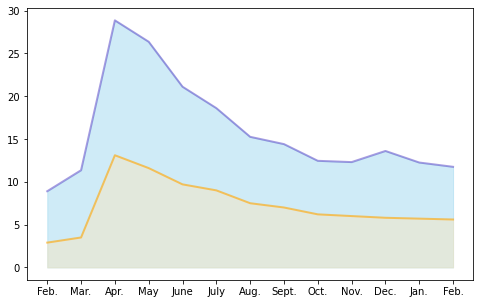

In [266]:
age.columns = age.loc[0,:]
months = age.columns.tolist()
months.remove(np.nan)
#make a list of the average between 16 to 24 year olds
young1 = age.loc[3,:].values.tolist()
young2 = age.loc[7,:].values.tolist()
young1.remove('16 to 19 years')
young2.remove('20 to 24 years')
young = []
for i in range(0, len(young1)):
    young.append((float(young1[i]) + float(young2[i])) / 2)

#list of 25 and older
old = age.loc[8,:].values.tolist()
old.remove('25 years and over')
old = [float(nums) for nums in old]


plt.fill_between(np.arange(13), young, color="skyblue", alpha=0.4)
plt.plot(np.arange(13), young, color="Slateblue", alpha=0.6, linewidth=2)

plt.fill_between(np.arange(13), old, color="moccasin", alpha=0.4)
plt.plot(np.arange(13), old, color="orange", alpha=0.6, linewidth=2)

plt.xticks(range(0,13), months)

plt.show()


Graphing these two subgroups, the relationship between the unemployment rate in younger people compared to older people becomes much more clear. Although there is a visible difference in the rates, does this quantify statistical significance?

### Testing unemployment by age

In [267]:
print(stats.mannwhitneyu(young, old, alternative='greater'))

sixteen = age.loc[3,:].values.tolist()
sixteen.pop(0)
sixteen = [float(x) for x in sixteen]

twenty = age.loc[7,:].values.tolist()
twenty.pop(0)
twenty = [float(x) for x in twenty]

men = age.loc[15,:].values.tolist()
men.pop(0)
men = [float(x) for x in men]

women = age.loc[28,:].values.tolist()
women.pop(0)
women = [float(x) for x in women]

print(stats.mannwhitneyu(sixteen, twenty))
print(stats.mannwhitneyu(sixteen, twenty, alternative='greater'))
print(stats.mannwhitneyu(men, women))


MannwhitneyuResult(statistic=159.0, pvalue=7.385988395886396e-05)
MannwhitneyuResult(statistic=46.5, pvalue=0.02719392167325047)
MannwhitneyuResult(statistic=122.5, pvalue=0.02719392167325047)
MannwhitneyuResult(statistic=84.0, pvalue=0.5)


The test confirmed by suspicion that younger people are unemployed at higher rates than older people. I still wondered what other tests I could run. I decided to narrow down the young category and test if there was a difference in 16-19 and 20-24 year olds. After running the first test the p value = 0.027 < 0.05 which means there is a difference between the means. I had to run an additional test to see which end the mean was off by. Testing with an alternative hypothesis that 16-19 > 20-24 resulted in a p value of 0.027 again. This means the alternate hypothesis should be accepted that there is statistical significance in the unemployment rates among teens versus any other age. 

I did another test between men and women and found no statistically significant difference between the means.  It was surprising that age was the biggest factor. Companies must view younger people as more easily replaceable.

## Industry Employment Counts

### Graph of the percent loss from March 2020 to April 2020


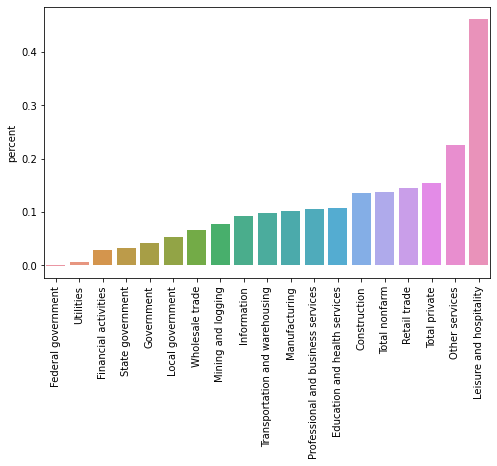

In [268]:
#one month change from march 2020 to arpil 2020 how many employees did they lose and what percentage was that

industry.set_index("Month", inplace=True)
industry.loc['Mar 2020':'Apr 2020']
differences = industry.loc['Mar 2020'] - industry.loc['Apr 2020']
percent_change = differences/industry.loc['Mar 2020']

df = pd.DataFrame(data=differences, index=industry.columns, columns=["difference"])
df.insert(1, "percent", percent_change)
df = df.sort_values(by = 'percent')
df.insert(2, "name", df.index)

sns.barplot(x=df.index,
            y=df['percent'])
plt.xticks(rotation=90)
plt.show()


Leisure and Hospitality lost the greatest percentage of employees during the month of the biggest drop

### Graph of the 12 month net change in thousands

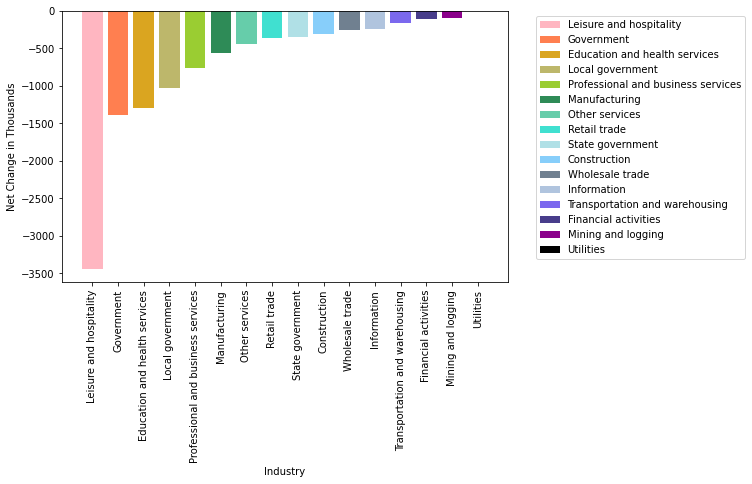

In [289]:
sortedByNumbers = cbi.sort_values(by='12-month net change (thousands)')
#the cbi data set includes subsector industries and isn't consistent with the sector names in the industry data set
#filter out the subdata so only the major sector categories are shown
#the data in the sectors shown includes the data in all the subsectors that are not shown
sortedByNumbers = sortedByNumbers[sortedByNumbers['Industry'].isin(df['name'])]

color_list = ['lightpink', 'coral', 'goldenrod', 'darkkhaki', 'yellowgreen', 'seagreen', 'mediumaquamarine', 'turquoise', 'powderblue', 'lightskyblue', 'slategray', 'lightsteelblue', 'mediumslateblue', 'darkslateblue', 'darkmagenta', 'black']

ax = plt.subplot(111)
bars = ax.bar(sortedByNumbers['Industry'], sortedByNumbers['12-month net change (thousands)'], color=color_list)
for i in range(0, len(color_list)):
    ax.bar(sortedByNumbers['Industry'], sortedByNumbers['12-month net change (thousands)'],width=0,color=color_list[i],label=names[i])
ax.legend(bbox_to_anchor=(1.05, 0.8, 0.3, 0.2), loc='upper left')
plt.xticks(rotation=90)
plt.xlabel("Industry")
plt.ylabel("Net Change in Thousands")
plt.show()


Based on the visualization above, Leasure and hospitality lost the greatest number of employees during the pandemic. 

### Graph of the 12 month percent change

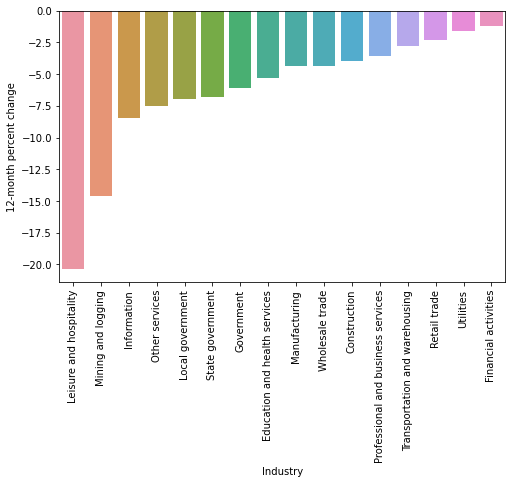

In [222]:
sortedByPercent = cbi.sort_values(by='12-month percent change')
sortedByPercent = sortedByPercent[sortedByPercent['Industry'].isin(df['name'])]

sns.barplot(x='Industry',
            y='12-month percent change',
            data=sortedByPercent)
plt.xticks(rotation=90)
plt.show()

a

### Graph of the 6 month percent change Feb 2021

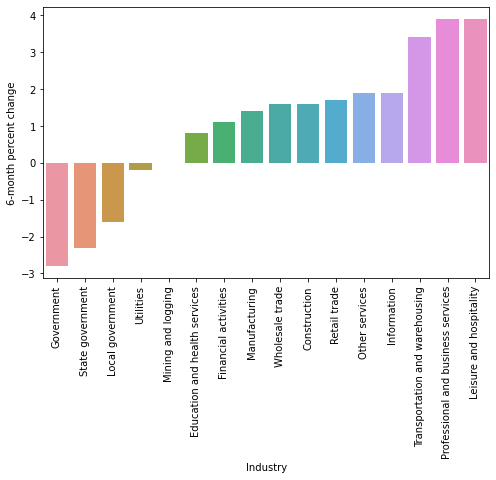

In [223]:
sortedByPercent = cbi.sort_values(by='6-month percent change')
sortedByPercent = sortedByPercent[sortedByPercent['Industry'].isin(df['name'])]

sns.barplot(x='Industry',
            y='6-month percent change',
            data=sortedByPercent)
plt.xticks(rotation=90)
plt.show()

the majority of sectors started to gain back employees from the initial covid-19 dropoff. From 6-months prior to Feb 2021, Leisure and Hospitality and Professional and Business services had an increase of almost 4% in the number of employees. Some sectors however have not made any increase in employment counts in the past 6 months, in fact government (state, local and federal) has continued to lose employees while the rest of the economy has been trying to recover.

### Graph of the 3 month percent change Feb 2021

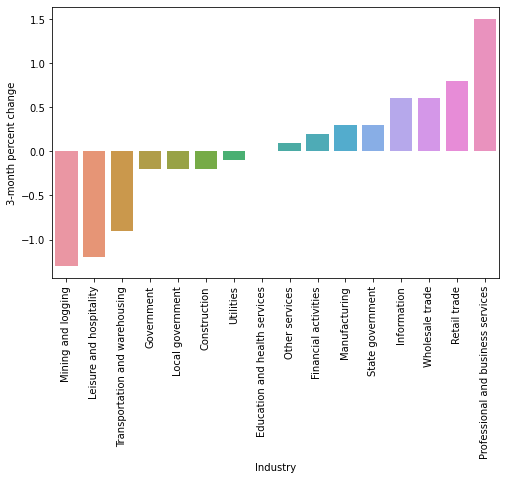

In [224]:
sortedByPercent = cbi.sort_values(by='3-month percent change')
sortedByPercent = sortedByPercent[sortedByPercent['Industry'].isin(df['name'])]

sns.barplot(x='Industry',
            y='3-month percent change',
            data=sortedByPercent)
plt.xticks(rotation=90)
plt.show()


Cutting the time period down to 3 months lets us analyze the change in employee count between December 2020 and Feb 2021. While about half of the sectors are continuing to recover from the initial covid drop in march 2020, a few industries are struggling to find new employees. Leisure and hospitality has the highest percentage increase in employees over a 6 month period, but that hiring momentum has died down and the sector has flipped with a 1% loss of employees over the past three months. 

Government and local government are still in the negatives

### Graph of the 1 month percent change Feb 2021

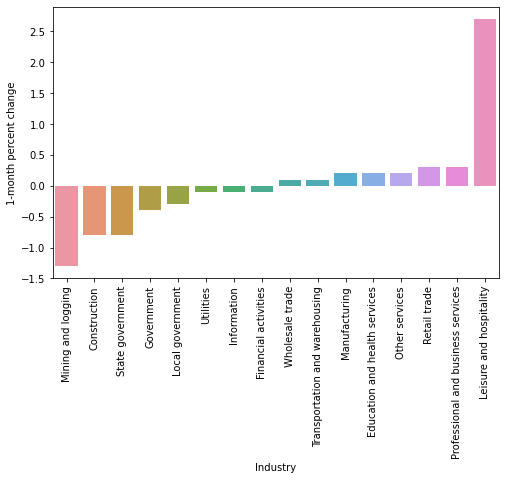

In [225]:
sortedByPercent = cbi.sort_values(by='1-month percent change')
sortedByPercent = sortedByPercent[sortedByPercent['Industry'].isin(df['name'])]

sns.barplot(x='Industry',
            y='1-month percent change',
            data=sortedByPercent)
plt.xticks(rotation=90)
plt.show()

The last time period available to analyze is the past month. During the month of february, leisure and hospitality seems to have rebounded from the 1% loss since december through an influx of hiring in february. 

Which industries were hit the hardest by COVID-19? - Leisure and Hospitality sector lost the largest number of employees. The biggest portion of that came from food jobs.
analyzing the net change over 12 months to see which industries have the lowest number of employees now compared to before the pandemic
also analyzed the percent change from march to april to show that LH lost the greatest percentage at the start and still has the greatest percentage lost after 12 months. 
One month charts show they have been recovering, hiring a lot more employees in the past 30 days. but still heavily down from the precovid peak

Which insustries were able to recover the fastest, and which industries have been struggling to recover from COVID-19 related unemployment?
The only industry with consistent negative numbers in all the charts is the government industry. Leisure and hospitality lost the largest percentage of employees at the beginning, but the same sector has had the largest percentage increase in the past 6 months. 

What groups of people faced the steepest numbers of unemployment?
Black or African American and Hispanic or Latino people have unemployment rates that are significantly greater than that of White and Asian groups. 
Young people, especially teens, faced drastically higher unemployment rates than their older counterparts. 

I focus more on unemployment differences and not enough on covid. Use the unemployment across different groups of people to focus on bias in the workplace. Final shifts to talking about bias in the workplace as shown with unemployment data. 